# Unveiling the Power of Advertising on Sales

Imagine you are a marketing manager trying to decide how to allocate your advertising budget across TV, radio, and newspapers. 

* Which channel will give you the best return on investment? 

* How much impact does each advertising medium have on your product’s sales? 

These questions are critical for businesses aiming to maximize their marketing effectiveness and grow their sales.

This dataset offers a fascinating glimpse into this very challenge. It captures advertising expenditures across three major channels (TV, radio, and newspaper) and the resulting sales performance. By analyzing this data, we can uncover how different types of advertising spending influence product sales, enabling data-driven decisions rather than guesswork.

## Importing Packages

First of all, let's import necessary packages to evaluate and predict the model.
Here, we'll be using NumPy, Pandas (for dataset reading), Seaborn (for correlation evaluation), Matplotlib (for graph visualization), Scikit-Learn (for model training and prediction) and statsmodels (for statistical analysis, including the Breusch-Pagan test to check for model reliability).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import joblib

In [2]:
# Reading the dataset using Pandas
df = pd.read_csv('../data/dataset.csv')
header = list(df)
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Exploratory Data Analysis (EDA): Statistical Measures 

Statistical measures help get a better understanding of trends, spread, and symmetry of the data. It can be done by calculating:

* Mean: The average value of the data.

* Standard Deviation: A measure of the spread of the data.

* Min/Max: The smallest and largest values in the dataset.

* Percentiles: 25%, 50%, 75% (with 50% being the median).

In [3]:
stats = df.describe().transpose()
print(stats[['mean', '25%', '50%', '75%', 'std', 'min', 'max']])

               mean     25%     50%      75%        std  min    max
TV         147.0425  74.375  149.75  218.825  85.854236  0.7  296.4
radio       23.2640   9.975   22.90   36.525  14.846809  0.0   49.6
newspaper   30.5540  12.750   25.75   45.100  21.778621  0.3  114.0
sales       14.0225  10.375   12.90   17.400   5.217457  1.6   27.0


## Correlations

Before building a multiple linear regression model, it is essential to understand how the predictor variables (TV, radio, and newspaper advertising budgets) relate to the target variable (sales). This exploratory data analysis helps identify patterns, and potential linear relationships.

For this, we'll be using Seaborn, which is  a powerful Python visualization library built on top of Matplotlib that simplifies the creation of informative and attractive statistical graphics. Seaborn allows the creation of correlation heatmaps using the heatmap() function, which visually summarize the Pearson correlation coefficients between all variables. 

#### But what's a Pearson's correlation?

Pearson's linear correlation quantifies the degree and direction of the linear relationship between variables. The coefficient can assume values ​​between -1 and 1, where

* -1: Negative perfect linear correlation
* 1: Positive perfect linear correlation
* 0: No linear correlation

So, basically this matrix highlights which advertising media have stronger linear associations with sales, guiding feature selection and model interpretation, and it's applied as follows.


<Axes: >

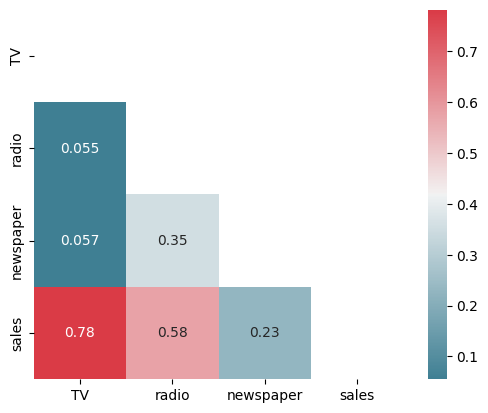

In [4]:
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df.corr(),mask= mask, cmap=cmap,annot=True,square=True)

Based on the correlation heatmap, TV and radio advertising budgets show strong and moderate positive correlations with sales, respectively, while newspaper shows a weaker correlation. These preliminary insights suggest these variables are relevant predictors and justify including them in the multiple linear regression model. However, it is important to note that correlation assesses each variable individually, whereas regression quantifies their unique contributions while accounting for other predictors.

*It's also important to highlight that this tool is specially useful in datasets with many variables, as correlation maps help spot redundant or irrelevant features early, reducing dimensionality and improving model efficiency.*

As we have seen this model contains relevant features, we can build a regression model to predict target variable (sales). For this, we will use the scikit-learn library to train a multiple linear regression model.

## Scikit-Learn

The process involves:

* *Defining the feature (X) and target (y)*: We select 'TV', 'radio', and 'newspaper' as our predictors (or independent variables) and 'sales' as the target (dependent variable).

* *Splitting the dataset*: We divide the data into training and testing sets to evaluate the model's performance on unseen data.

* *Training the model*: We fit a LinearRegression model from scikit-learn using the training data.

* *Evaluating the model*: After training, we use the test set to predict sales and assess the model's performance using metrics such as Mean Squared Error (MSE) and R² score.

In [5]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df[['TV', 'radio', 'newspaper']],df['sales'],test_size=0.30, random_state=42)                                                    

In [10]:
# Training the model
regressor = LinearRegression().fit(X_train, y_train)
joblib.dump(regressor, '../models/sales_model.pkl') #saving model

print(f'\nR2 score (training set): {regressor.score(X_train, y_train):.4f}')

# Making predictions/evaluation
y_pred_test = regressor.predict(X_test)
sk_r2_score = regressor.score(X_test, y_test)
sk_mse = mean_squared_error(y_test, y_pred_test)
sk_rmse = root_mean_squared_error(y_test, y_pred_test)

print(f'R2 score (testing set): {sk_r2_score:.4f}')
print(f'MSE (testing set): {sk_mse}')
print(f'RMSE (testing set): {sk_rmse}')
print(f'Coefficient (w): {regressor.coef_}')
print(f'Intercept (b): {regressor.intercept_:.2f}')


R2 score (training set): 0.9055
R2 score (testing set): 0.8609
MSE (testing set): 3.79679723671522
RMSE (testing set): 1.9485372043446387
Coefficient (w): [0.04405928 0.1992875  0.00688245]
Intercept (b): 2.71


## Explanation of Regression Metrics and Parameters

* *R² score (training set): 0.9055*

    This measures how well the regression model fits the training data. An R² of 0.9055 means that approximately 90.55% of the variability in sales is explained by the model on the training data, indicating a strong fit.

* *R² score (testing set): 0.8609*

     This is the R² score calculated on the testing dataset, which was not used during model training. A value of 0.8609 means the model explains about 86.09% of the variance in sales for unseen data, showing good generalization and predictive performance.

* *MSE (testing set): 3.7968*

    This value reflects how well the model performed on the testing data. The relatively low value suggests that the model fits the testing data reasonably well.

* *RMSE (testing set): 1.9485*

    This means that, on average, the model's predictions deviate from the actual sales values by about 1.95 units.

## Linear Regression Equation

The regression model can be expressed as:

#### sales = 2.71 + 0.0441 × (TV) + 0.1993 × (radio) + 0.0069 × (newspaper)

Where:

* 2.71 is the intercept (baseline sales when all advertising spend is zero)

* Each coefficient shows the expected increase in sales for a one-unit increase in the respective advertising budget, holding others constant.

We can observe that radio has the greatest impact on sales as it has the biggest coefficient, followed by TV. In contrast, advertising in newspapers appears to have little to no significant effect.

## Visualization Target vs. Prediction

After exploring the relationships between advertising media and sales using correlation analysis and understanding their individual associations, we proceed to evaluate how well our multiple linear regression model predicts sales based on these features.

The code snippet below visualizes the actual sales values (targets) versus the predicted sales values from the scikit-learn regression model on the testing dataset:

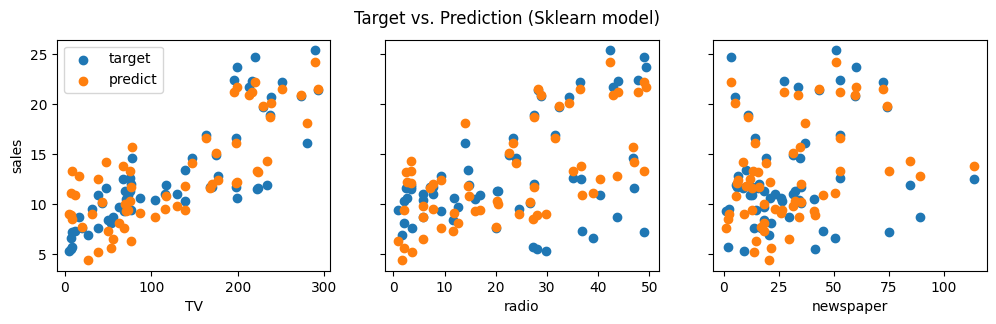

In [11]:
# Prediction on testing set
fig,ax=plt.subplots(1,3,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test.iloc[:,i],y_test, label = 'target')
    ax[i].set_xlabel(header[i])
    ax[i].scatter(X_test.iloc[:,i], y_pred_test, label = 'predict')
ax[0].set_ylabel("sales"); ax[0].legend();
fig.suptitle("Target vs. Prediction (Sklearn model)")
plt.show()

## Residuals

In addition to the correlation analysis and prediction visualization, residual plots serve as a vital diagnostic tool to further evaluate the accuracy and reliability of the regression model.

By plotting residuals against predicted values, we can check whether the assumptions of linear regression hold, such as:

* Linearity: Residuals should be randomly scattered without systematic patterns.

* Homoscedasticity: The variance of residuals should be constant across predicted values.

* Outliers or influential points: Large residuals indicate observations where the model performs poorly.

This step complements the earlier analyses by identifying potential model misspecifications or data issues that correlation and prediction plots alone might not reveal.

Thus, residual analysis ties together the exploratory insights from correlation and the predictive evaluation from scatter plots, ensuring a robust and reliable multiple linear regression model.



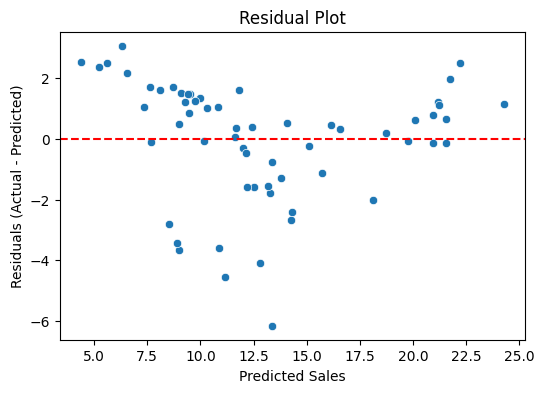

In [34]:
residuals = y_test - y_pred_test

# Plot residuals vs predicted values
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

We can see that the residuals appear to be roughly centered around zero (supporting the linearity assumption) and there are no extreme outliers. However, the spread of the residuals seems to vary across the range of predicted sales, where for lower predicted sales (left side of the plot), residuals are more tightly clustered, while for mid-range and higher predicted sales, the spread increases and becomes more uneven. This assigns that there may be a increase in variance as predicted sales increase, which suggests heteroscedasticity, i. e, the variance of the residuals is not entirely constant.

#### How to see if the model has heteroscedasticity?

A option is to fit an OLS regression model, and then plot residuals vs. fitted values to look for:

* Random scatter around zero with constant spread → likely no heteroscedasticity.

* Patterns or “fan shape” (variance increasing/decreasing with fitted values) → possible heteroscedasticity.

In [37]:
# Fitting OLS model
X_const = sm.add_constant(df[['TV', 'radio', 'newspaper']])  # Add intercept
ols_model = sm.OLS(df['sales'], X_const).fit()

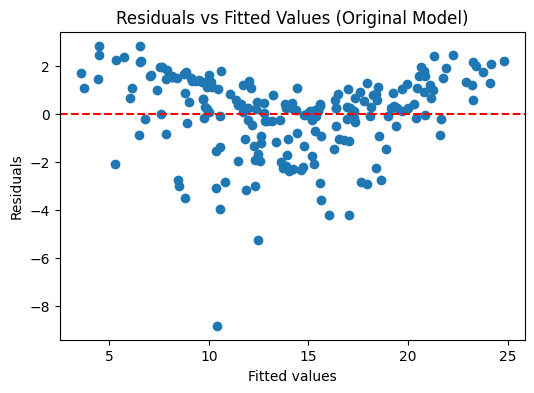

In [38]:
# Plot residuals vs. fittes values
residuals = ols_model.resid
fitted = ols_model.fittedvalues

plt.figure(figsize=(6,4))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Original Model)')
plt.show()

Looking at the residuals vs fitted values plot, we can observe the residuals are randomly scattered around zero across all fitted values, and there is no clear fan or cone shape pattern that would indicate heteroscedasticity.

For confirming this result, there exists a statistical test called Breusch-Pagan, used to detect heteroscedasticity in a regression model’s residuals. The test uses the following null and alternative hypotheses:

* Null Hypothesis (H0): if the residuals are distributed with equal variance, then Homoscedasticity is present.

* Alternative Hypothesis (HA): if the residuals are not distributed with equal variance, then Heteroscedasticity is present.

#### How to Interpret the Test Output?

The test returns several statistics:

* Lagrange multiplier statistic: The main test statistic, which follows a chi-square distribution.

* p-value: The probability of observing the test statistic under the null hypothesis.

* F-value and F p-value: Alternative test statistics using the F-distribution.

Decision rule:

If the p-value is less than 0.05, reject the null hypothesis (evidence of heteroscedasticity).

If the p-value is greater than 0.05, fail to reject the null hypothesis (no evidence of heteroscedasticity)

In [ ]:
# Applying Breusch-Pagan test
bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(5.1328723532856335), 'p-value': np.float64(0.16232215845412135), 'f-value': np.float64(1.7209042102915988), 'f p-value': np.float64(0.1639990890560717)}


The Breusch-Pagan test results for the model are:

*  'Lagrange multiplier statistic': 5.13,

*  'p-value': 0.1623,

*  'f-value': 1.72,

*  'f p-value': 0.1640

As we can see, the p-value = 0.1623 is greater than the common significance level of 0.05. This means there is not enough evidence to reject the null hypothesis of homoscedasticity. 

#### But why testing for heteroscedasticity is important?

When heteroscedasticity is present in a model, the results of the regression become unreliable. 

#### What to do if heteroscedasticity is detected?

To overcome this, we can apply transformations, for example, log transformation on target to stabilize variance. We could also use Weighted Least Squares (WLS) or robust standard errors to obtain valid inference or consider alternative regression models that account for heteroscedasticity.

## Final Analysis: Marketing Strategy

It is important to understand the difference between simple correlation and multiple regression coefficients when interpreting the impact of advertising channels on sales. As we have seen, Pearson correlation measures the strength and direction of the linear relationship between two variables in isolation. For example, the high correlation between TV advertising and sales (0.78) indicates a strong association, but it does not account for the influence of other variables like radio or newspaper advertising.

On the other hand, multiple regression coefficients represent the unique effect of each advertising channel on sales while controlling for the other variables in the model. This means that even if TV has a higher simple correlation, radio may have a greater incremental impact on sales once the effect of TV is accounted for.

So, the strategy is to invest in radio advertising followed by TV, while reducing reliance on newspaper ads.